<a href="https://colab.research.google.com/github/elmerleiva1/Laboratorio-An-lisis-Numerico/blob/main/Copia_de_Copia_de_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

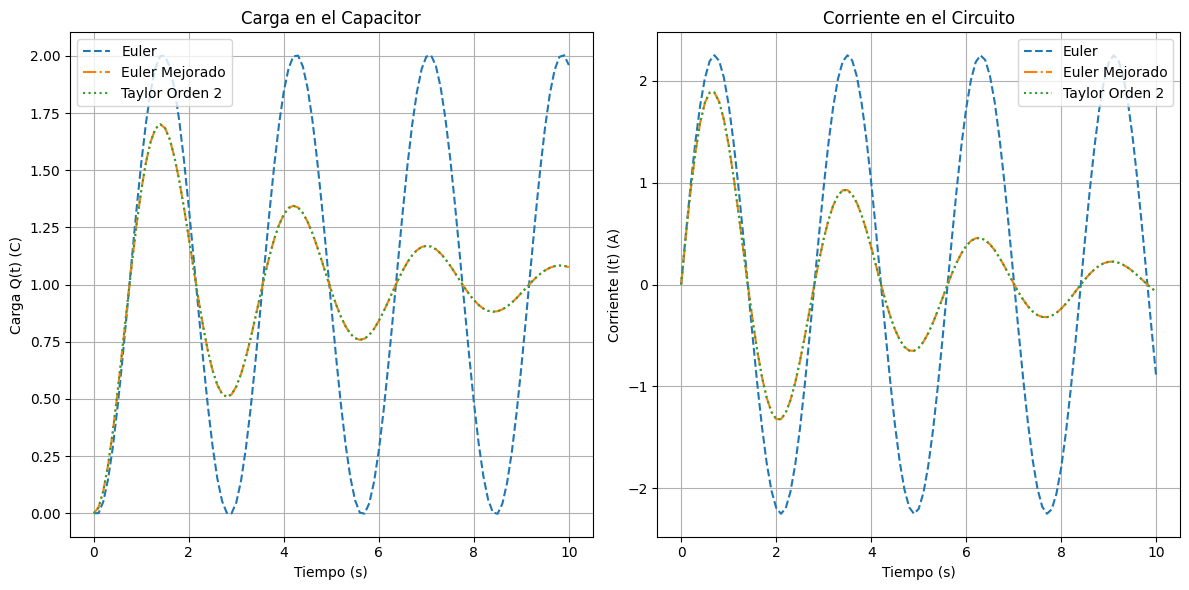

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del circuito RLC
L = 1.0      # Inductancia (H)
R = 0.5      # Resistencia (Ω)
C = 0.2      # Capacitancia (F)
V0 = 5.0     # Voltaje constante (V)

# Definición de la fuente de voltaje (puede ser variable V(t))
def V(t):
    return V0  # Fuente DC (para simplificar)

# Sistema de EDOs de primer orden (para Q y I=dQ/dt)
def f(t, Q, I):
    dQdt = I
    dIdt = (V(t) - R * I - Q / C) / L
    return dQdt, dIdt

# Método de Euler
def euler(f, t0, Q0, I0, tf, h):
    t = np.arange(t0, tf + h, h)
    Q = np.zeros(len(t))
    I = np.zeros(len(t))
    Q[0], I[0] = Q0, I0
    for i in range(len(t) - 1):
        dQdt, dIdt = f(t[i], Q[i], I[i])
        Q[i+1] = Q[i] + h * dQdt
        I[i+1] = I[i] + h * dIdt
    return t, Q, I

# Método de Euler Mejorado (Runge-Kutta orden 2)
def euler_mejorado(f, t0, Q0, I0, tf, h):
    t = np.arange(t0, tf + h, h)
    Q = np.zeros(len(t))
    I = np.zeros(len(t))
    Q[0], I[0] = Q0, I0
    for i in range(len(t) - 1):
        k1_Q, k1_I = f(t[i], Q[i], I[i])
        k2_Q, k2_I = f(t[i] + h, Q[i] + h * k1_Q, I[i] + h * k1_I)
        Q[i+1] = Q[i] + h * (k1_Q + k2_Q) / 2
        I[i+1] = I[i] + h * (k1_I + k2_I) / 2
    return t, Q, I

# Método de Taylor (orden 2)
def taylor_orden2(f, t0, Q0, I0, tf, h):
    t = np.arange(t0, tf + h, h)
    Q = np.zeros(len(t))
    I = np.zeros(len(t))
    Q[0], I[0] = Q0, I0
    for i in range(len(t) - 1):
        dQdt, dIdt = f(t[i], Q[i], I[i])
        # Derivadas segundas (aproximadas)
        d2Qdt2 = dIdt
        d2Idt2 = (-R * dIdt - (1/C) * dQdt) / L  # Derivada de dIdt
        Q[i+1] = Q[i] + h * dQdt + (h**2 / 2) * d2Qdt2
        I[i+1] = I[i] + h * dIdt + (h**2 / 2) * d2Idt2
    return t, Q, I

# Soluciones
t_euler, Q_euler, I_euler = euler(f, 0, 0, 0, 10, 0.1)
t_em, Q_em, I_em = euler_mejorado(f, 0, 0, 0, 10, 0.1)
t_taylor, Q_taylor, I_taylor = taylor_orden2(f, 0, 0, 0, 10, 0.1)

# Gráficas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_euler, Q_euler, label="Euler", linestyle="--")
plt.plot(t_em, Q_em, label="Euler Mejorado", linestyle="-.")
plt.plot(t_taylor, Q_taylor, label="Taylor Orden 2", linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Carga Q(t) (C)")
plt.title("Carga en el Capacitor")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t_euler, I_euler, label="Euler", linestyle="--")
plt.plot(t_em, I_em, label="Euler Mejorado", linestyle="-.")
plt.plot(t_taylor, I_taylor, label="Taylor Orden 2", linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente I(t) (A)")
plt.title("Corriente en el Circuito")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()